In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
from scipy.stats import spearmanr
import ast
from scipy.stats import kstest
import matplotlib
matplotlib.rcParams.update({'font.size': 9})
cm = 1/2.54

In [27]:
out = r"C:\Users\Maciek\Documents\Studia\Magisterka\Images"
model_name = "LSTM"
task = "Amazon"

In [28]:
# Method used to decode filename of model into balancing method, imbalance %, model name, and model id returned in an array
def get_method_and_percentage(name):
    string = "_".join(name.split("_")[:-1])
    percentage = ""
    perc = 0
    for i in range(len(string)):
        if string[i].isdigit():
            perc = i
            percentage += string[i]
        elif perc>0:
            break
    perc+=2 if len(percentage)>0 else 0
    method = ""
    for i in range(perc, len(string)):
        if string[i].isdigit():
            model_id = string[i]
        else:
            method += string[i]
    method = "_".join(method.split("_")[:-1])
    model = name.split("_")[-1][:-4]
    model_id = name.split("_")[-2].split(".")[0]
    return [method, percentage, model, model_id]



if task == "Amazon":
    df = pd.read_csv(fr"C:\Users\Maciek\Documents\Studia\Magisterka\GitHub\BalancingMethodsNLP\Results\XAI_results_amazon_{model_name}.csv")
else:
    df = pd.read_csv(fr"C:\Users\Maciek\Documents\Studia\Magisterka\GitHub\BalancingMethodsNLP\Results\XAI_results_final_{model_name}.csv")

# for i in range(2,5):
#     df = pd.concat([df, pd.read_csv(f"XAI_results{i}.csv")])
pd.set_option('display.width', 1000)

df2=df
name = pd.DataFrame(list(df["model"].map(lambda x:get_method_and_percentage(x))))
name.columns = ["Balancing method", "Imbalance %", "Model name", "Model ID"]
df = pd.concat([name, df[df.columns[2:]]], axis=1)
df = df.sort_values(["id", "Imbalance %", "Model ID", "Balancing method", "Model name"])
df.columns = [str(col).replace("eval_", "") for col in df.columns]

df = df[df["Balancing method"]!="amazon_review"]
df


,Balancing method,Imbalance %,Model name,Model ID,id,words_sentence,lime_sentence,words_word,lime_word
3240,Contextual_word_embedding,10,LSTM,0,0,"['junk', 'I', 'bought', 'this', 'item', 'today...","[-0.008267265094302312, 4.253608399240801e-05,...",['4' '5' '8gb' 'After' 'Aside' 'I' 'Kmart' 'Ma...,"[0.005553982770716076, 0.02403876485804658, 0...."
4360,LLama_complex,10,LSTM,0,0,"['junk', 'I', 'bought', 'this', 'item', 'today...","[-0.0021227872877921856, 0.004784992682393586,...",['4' '5' '8gb' 'After' 'Aside' 'I' 'Kmart' 'Ma...,"[0.0032756727226938166, 0.00262232114677893, -..."
2560,LLama_simple,10,LSTM,0,0,"['junk', 'I', 'bought', 'this', 'item', 'today...","[0.0009374816433846326, -0.001590335620335177,...",['4' '5' '8gb' 'After' 'Aside' 'I' 'Kmart' 'Ma...,"[0.0032429309168991705, 0.0019379752457806016,..."
1520,Spelling_mistake,10,LSTM,0,0,"['junk', 'I', 'bought', 'this', 'item', 'today...","[0.017598438365991162, -0.19360058996532314, -...",['4' '5' '8gb' 'After' 'Aside' 'I' 'Kmart' 'Ma...,"[0.02604974785870407, 0.023900887334768358, 0...."
640,Summarization,10,LSTM,0,0,"['junk', 'I', 'bought', 'this', 'item', 'today...","[-0.0028926212025856125, 0.0007789895938210334...",['4' '5' '8gb' 'After' 'Aside' 'I' 'Kmart' 'Ma...,"[0.019819022511004255, 0.016881104674674154, 0..."
...,...,...,...,...,...,...,...,...,...
4839,ROS,50,LSTM,4,39,"['very', 'short', 'battery', 'life', 'Very', '...","[-0.0014215508904977803, 0.0018029768057870126...",['2' '7' 'Android' 'BUT' 'I' 'If' 'New' 'Pc' '...,"[-0.08876221262339022, 0.12425175512853462, -0..."
3719,Spelling_mistake,50,LSTM,4,39,"['very', 'short', 'battery', 'life', 'Very', '...","[0.018121258055533565, -0.03364725912045687, -...",['2' '7' 'Android' 'BUT' 'I' 'If' 'New' 'Pc' '...,"[-0.20357161245684294, 0.08047935137345207, -0..."
1399,Synonym replacement,50,LSTM,4,39,"['very', 'short', 'battery', 'life', 'Very', '...","[-0.012625486364549084, 0.0014007470977594498,...",['2' '7' 'Android' 'BUT' 'I' 'If' 'New' 'Pc' '...,"[0.03293441623936776, -0.007772861473208808, -..."
4519,imbalanced,50,LSTM,4,39,"['very', 'short', 'battery', 'life', 'Very', '...","[0.022525575966610492, 0.010364591839959688, 0...",['2' '7' 'Android' 'BUT' 'I' 'If' 'New' 'Pc' '...,"[-0.16746482373322844, 0.12315246681916582, -0..."


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Contextual_word_embedding'),
  Text(1, 0, 'LLama_complex'),
  Text(2, 0, 'LLama_simple'),
  Text(3, 0, 'Spelling_mistake'),
  Text(4, 0, 'Summarization'),
  Text(5, 0, 'Synonym replacement'),
  Text(6, 0, 'imbalanced'),
  Text(7, 0, 'paraphrase'),
  Text(8, 0, 'ROS'),
  Text(9, 0, 'original')])

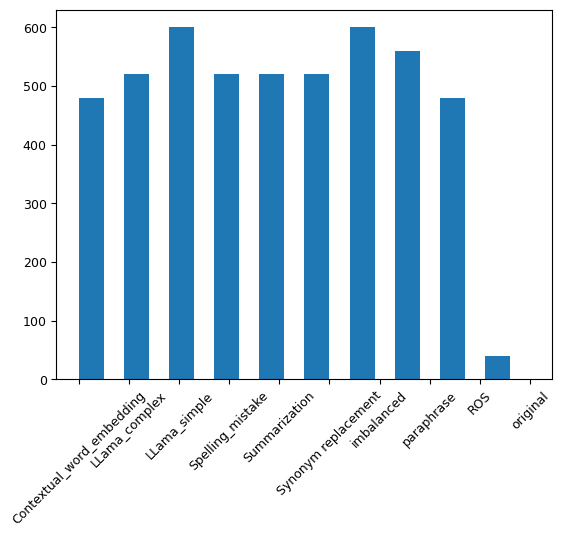

In [29]:
plt.hist(df["Balancing method"], width=0.5)
plt.xticks(rotation=45)

In [30]:
df_tm = df
df_tm["test"]=df["words_sentence"].apply(lambda x:len(ast.literal_eval(x)))
df_tm.sort_values(["test"])

,Balancing method,Imbalance %,Model name,Model ID,id,words_sentence,lime_sentence,words_word,lime_word,test
2108,paraphrase,50,LSTM,4,28,"['Awesome', 'Totally', 'surprised', 'by', 'thi...","[0.14160384562295816, 0.16925586461369208, -0....",['Awesome' 'It' 'Microsoft' 'Totally' 'Vista' ...,"[0.14160384562295816, -0.028113557980340872, -...",16
1148,Synonym replacement,10,LSTM,4,28,"['Awesome', 'Totally', 'surprised', 'by', 'thi...","[0.21031321521988242, -0.04214884632505072, -0...",['Awesome' 'It' 'Microsoft' 'Totally' 'Vista' ...,"[0.21031321521988242, 0.030634547717775063, -0...",16
3388,imbalanced,10,LSTM,4,28,"['Awesome', 'Totally', 'surprised', 'by', 'thi...","[0.0025228953343692795, -0.003316515067699537,...",['Awesome' 'It' 'Microsoft' 'Totally' 'Vista' ...,"[0.0025228953343692795, 0.0015227296205950261,...",16
1348,paraphrase,10,LSTM,4,28,"['Awesome', 'Totally', 'surprised', 'by', 'thi...","[0.02844059641069571, -0.00265340238341535, 0....",['Awesome' 'It' 'Microsoft' 'Totally' 'Vista' ...,"[0.02844059641069571, 0.02590713821380872, -0....",16
3228,original,100,LSTM,0,28,"['Awesome', 'Totally', 'surprised', 'by', 'thi...","[0.019864921885682216, -0.01728159148027892, -...",['Awesome' 'It' 'Microsoft' 'Totally' 'Vista' ...,"[0.019864921885682216, -0.04233335736178788, -...",16
...,...,...,...,...,...,...,...,...,...,...
4777,LLama_complex,50,LSTM,1,17,"['Inexpensive', 'multi', 'talented', 'tablet',...","[0, 0, 0, 0, 0, 0, 0, -0.023097091164918024, -...",['0' '1' '10' '1080' '1080p' '1600x1200' '2' '...,"[0, 0, 0, 0.01407495505827123, 0, -0.007690828...",861
697,LLama_simple,50,LSTM,1,17,"['Inexpensive', 'multi', 'talented', 'tablet',...","[0.017557315241285287, 0.03086782532946276, 0....",['0' '1' '10' '1080' '1080p' '1600x1200' '2' '...,"[-0.027122934199181204, -0.03822761159066108, ...",861
57,ROS,50,LSTM,1,17,"['Inexpensive', 'multi', 'talented', 'tablet',...","[0.010138735870491458, 0, 0, 0, 0, -0.00963793...",['0' '1' '10' '1080' '1080p' '1600x1200' '2' '...,"[0, 0.024617221551811393, 0, 0, 0, 0.031613427...",861
4217,Summarization,50,LSTM,1,17,"['Inexpensive', 'multi', 'talented', 'tablet',...","[0, 0.02900061578145362, 0.03542908982179447, ...",['0' '1' '10' '1080' '1080p' '1600x1200' '2' '...,"[0, -0.029370575917458237, 0, 0.01503505764358...",861


_________________ original _________________
to kyros or not to kyros for my use and the price and being american made i hope the only thing i don t like and the only reason 
i did nt give it 5 stars is there is no way to change the battery when it goes bad and it will go bad 

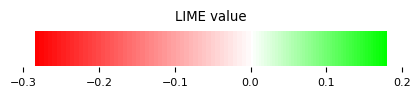

_________________ Contextual_word_embedding _________________
to kyros or not to kyros for my use and the price and being american made i hope the only thing i don t like and the only reason 
i did nt give it 5 stars is there is no way to change the battery when it goes bad and it will go bad 

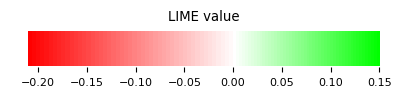

_________________ LLama_complex _________________
to kyros or not to kyros for my use and the price and being american made i hope the only thing i don t like and the only reason 
i did nt give it 5 stars is there is no way to change the battery when it goes bad and it will go bad 

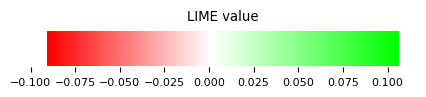

_________________ LLama_simple _________________
to kyros or not to kyros for my use and the price and being american made i hope the only thing i don t like and the only reason 
i did nt give it 5 stars is there is no way to change the battery when it goes bad and it will go bad 

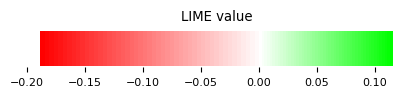

_________________ ROS _________________
to kyros or not to kyros for my use and the price and being american made i hope the only thing i don t like and the only reason 
i did nt give it 5 stars is there is no way to change the battery when it goes bad and it will go bad 

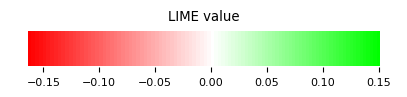

_________________ Spelling_mistake _________________
to kyros or not to kyros for my use and the price and being american made i hope the only thing i don t like and the only reason 
i did nt give it 5 stars is there is no way to change the battery when it goes bad and it will go bad 

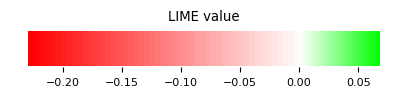

_________________ Summarization _________________
to kyros or not to kyros for my use and the price and being american made i hope the only thing i don t like and the only reason 
i did nt give it 5 stars is there is no way to change the battery when it goes bad and it will go bad 

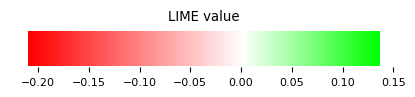

_________________ Synonym replacement _________________
to kyros or not to kyros for my use and the price and being american made i hope the only thing i don t like and the only reason 
i did nt give it 5 stars is there is no way to change the battery when it goes bad and it will go bad 

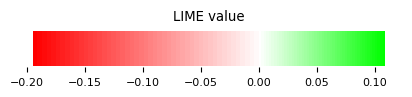

_________________ imbalanced _________________
to kyros or not to kyros for my use and the price and being american made i hope the only thing i don t like and the only reason 
i did nt give it 5 stars is there is no way to change the battery when it goes bad and it will go bad 

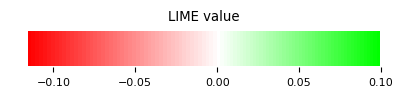

_________________ paraphrase _________________
to kyros or not to kyros for my use and the price and being american made i hope the only thing i don t like and the only reason 
i did nt give it 5 stars is there is no way to change the battery when it goes bad and it will go bad 

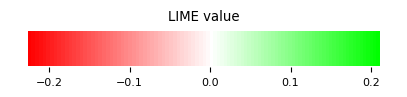

In [31]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12
plt.rc('font', size=SMALL_SIZE)  
def color_output(words, explanations):
    coloring_range = ( np.min(explanations), np.max(explanations))
    l=0
    for j in range(len(words)):
        if explanations[j]<0:
            perc = explanations[j]/coloring_range[0]
            r, g, b = 255,int(-255*perc+255),int(-255*perc+255)
        else:
            perc = explanations[j]/coloring_range[1]
            r, g, b = int(-255*perc+255),255,int(-255*perc+255)
        l+=len(words[j])
        if l>100:
            print("\n",end="")
            l=0
        print(f'\033[38;2;{r};{g};{b}m\033[48;2;0;0;0m{words[j]} \033[0m', end="") 
    
    n = 50
    lin_1 = np.linspace(coloring_range[0],0,n)
    diff_1 = lin_1[1]-lin_1[0]
    lin_2 = np.linspace(0, coloring_range[1],n)
    diff_2 = lin_2[1]-lin_2[0]
    # plt.style.use('dark_background')
    fig, ax = plt.subplots(figsize=(5,1/2))
    plt.plot()

    for i in range(n):
        perc = (lin_1[0]-lin_1[i])/coloring_range[0]
        rect = patches.Rectangle((coloring_range[0]-lin_1[i], 0), diff_1, 1, facecolor=(1,int(-255*perc+255)/255,int(-255*perc+255)/255))
        ax.add_patch(rect)
        perc = (lin_2[i])/coloring_range[1]
        rect = patches.Rectangle((lin_2[i], 0), diff_2, 1, facecolor=(int(-255*perc+255)/255,1,int(-255*perc+255)/255))
        ax.add_patch(rect)
    ax.get_yaxis().set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.title("LIME value")
    plt.show()
    
df_tmp = df[(df["id"]==4)&((df["Imbalance %"].astype(int)==20)| (df["Imbalance %"].astype(int)==100))&(df["Model ID"].astype(int)==0)&(df["Balancing method"]!="LLama")]
tmp = 5 if task=="Amazon" else 6
for val in df_tmp.values:
    print(f"_________________ {val[0]} _________________")    
    color_output(ast.literal_eval(val[tmp]), ast.literal_eval(val[tmp+1]))

In [32]:
# Method used to calculate p_values from wilcoxon-signed rank test between two explanations
def get_p_values(df, lime="lime_sentence"):
    results = []
    
    # Selecting model trained on original data for comparison
    original = df[df["Balancing method"]=="Original"]

    # Looping through imbalance % model id balancing method and instances
    for imbalance in np.unique(df["Imbalance %"]):
        for model_id in np.unique(df["Model ID"]):
            # Selecting model trained on imbalanced data for comparison
            df_tmp = df[(df["Imbalance %"]==imbalance)&(df["Model ID"]==model_id)&(df["Balancing method"]!="Original")]
            imbalanced = df_tmp[df_tmp["Balancing method"]=="Imbalanced"]
            # Filtering models based on balanced datasets
            other_methods = df_tmp[df_tmp["Balancing method"]!="Imbalanced"]
            for method in np.unique(other_methods["Balancing method"]):
                for i in np.unique(other_methods.id):
                    # Saving basic model identification
                    res = {}
                    res["Model ID"] = model_id
                    res["Imbalance %"] = imbalance
                    res["Balancing method"] = method
                    res["id"] = i
                    # Comparing xai from original model and xai from balanced model
                    df_tmp = other_methods[other_methods["Balancing method"]==method]
                    x1 = ast.literal_eval(df_tmp[df_tmp.id==i][lime].values[0])
                    x2 = ast.literal_eval(original[original.id==i][lime].values[0])
                    res["original"] = stats.wilcoxon(x1, x2)[1]
                    res["spearman_original"] = spearmanr(x1, x2)[0]
                    res["normality_original"] = kstest(np.array(x1)-np.array(x2), 'norm')[1]
                    # Comparing xai from imbalanced model and xai from balanced model if imbalanced model was not bad (acc>0.6 & f1!=0)
                    if len(imbalanced)>0:
                        x3 = ast.literal_eval(imbalanced[imbalanced.id==i][lime].values[0])
                        res["imbalanced"] = stats.wilcoxon(x1, x3)[1]
                        res["spearman_imbalanced"] = spearmanr(x1, x3)[0]
                        res["normality_imbalanced"] = kstest(np.array(x1)-np.array(x2), 'norm')[1]
                    results.append(res)
    return pd.DataFrame(results)

# Method used to join results and metrics tables
def add_metrics(results, metrics):
    
    # Changing column types to get agreement between tables
    results['Model ID'] = results['Model ID'].astype(str)
    metrics['Model ID'] = metrics['Model ID'].astype(str)
    results['Imbalance %'] = results['Imbalance %'].astype(str)
    metrics['Imbalance %'] = metrics['Imbalance %'].astype(str)
    metrics["Balancing method"] = metrics["Balancing method"].apply(lambda x: x[0].upper() + x[1:].lower().replace("_"," ")) # Capitalizing balancing method
    
    # Merging tables
    final = results.merge(metrics, on=['Model ID', 'Imbalance %', 'Balancing method'], how='left')
    
    # Removal of bad models that slipped through initial filtering due to a spelling mistake
    return final[(final["auc"]>=0.6) & (final["f1"]!=0)]


# Method used to preprocess the dataset and get p_values for all models
def preprocess_dataset(df):
       
    # Adding additionall columns based on model name
    name = pd.DataFrame(list(df["model"].map(lambda x:get_method_and_percentage(x))))
    name.columns = ["Balancing method", "Imbalance %", "Model name", "Model ID"]
    name["Balancing method"] = name["Balancing method"].apply(lambda x: x[0].upper() + x[1:].lower().replace("_"," ")) # Capitalizing balancing method
    df = pd.concat([name, df[df.columns[2:]]], axis=1)
    df = df.sort_values(["id", "Imbalance %", "Model ID", "Balancing method", "Model name"])
    df.columns = [str(col).replace("eval_", "") for col in df.columns]
        
        
    final_sentence = []
    final_word = []
    for mn in ["SVM", "LSTM", "DistilBERT"]:
        if task == "Amazon":
            metrics = pd.read_csv(f"amazon-review_{mn}.csv")
        else:
            metrics = pd.read_csv(f"nlpaug_{mn}.csv")
        df_tmp = df[df["Model name"]==mn]
        
        # Filtering out models that were not supposed to be in the dataset
        df_tmp = df_tmp[df_tmp["Balancing method"]!="Amazon review"]
        results_sentence = get_p_values(df_tmp, lime="lime_sentence")
        results_word = get_p_values(df_tmp, lime="lime_word")
        final_sentence.append(add_metrics(results_sentence, metrics[metrics["Model name"]==mn]))
        final_word.append(add_metrics(results_word, metrics[metrics["Model name"]==mn]))
    
    return pd.concat(final_sentence), pd.concat(final_word)





In [33]:
# Loading the dataset with results from XAI methods
if task == "Amazon":
    path = r"C:\Users\Maciek\Documents\Studia\Magisterka\GitHub\BalancingMethodsNLP\Results\XAI_results_amazon_"
else:
    path = r"C:\Users\Maciek\Documents\Studia\Magisterka\GitHub\BalancingMethodsNLP\Results\XAI_results_final_"
 
df = pd.concat([pd.read_csv(path+f"{model}.csv") for model in ["SVM", "LSTM", "DistilBERT"]])
df.reset_index(drop=True, inplace=True)
display(df)

# Preprocessing the dataset and getting p_values for all models    
final_sentence, final_word = preprocess_dataset(df)
display(final_sentence)
final_sentence.shape

,Unnamed: 0,model,id,words_sentence,lime_sentence,words_word,lime_word
0,0,amazon_review_50_imbalanced_3_SVM.obj,0,"['junk', 'I', 'bought', 'this', 'item', 'today...","[-0.003793765830207563, -0.0016514947194475448...",['4' '5' '8gb' 'After' 'Aside' 'I' 'Kmart' 'Ma...,"[-0.0013365187856096627, -0.001943402772433773..."
1,1,amazon_review_50_imbalanced_3_SVM.obj,1,"['I', 'd', 'give', 'it', '6', 'stars', 'if', '...","[-0.00925297314576525, -0.008984065730127598, ...",['1' '100' '2' '3' '4' '5' '6' '7' 'And' 'Andr...,"[-0.008653353612176824, 0.0009080727006301128,..."
2,2,amazon_review_50_imbalanced_3_SVM.obj,2,"['Very', 'good', 'bang', 'for', 'your', 'buck'...","[0.026781618055836766, 0.04490728735278903, 0....",['24' '3' '7' 'Another' 'As' 'Go' 'Hope' 'I' '...,"[0.03058485747864986, -0.008722407106490073, -..."
3,3,amazon_review_50_imbalanced_3_SVM.obj,3,"['To', 'learn', 'on', 'it', 'is', 'great', 'I'...","[-0.021977011097483852, 0.0008823057263826397,...",['2' '4GB' '8' 'After' 'I' 'In' 'It' 'Overall'...,"[-0.0008210919692663685, 0.0001790269463376758..."
4,4,amazon_review_50_imbalanced_3_SVM.obj,4,"['to', 'kyros', 'or', 'not', 'to', 'kyros', 'f...","[-0.0868586550095909, 0.032482789098436216, -0...",['5' 'american' 'and' 'bad' 'battery' 'being' ...,"[0.005442515418285386, 0.018928624310060222, 0..."
...,...,...,...,...,...,...,...
15715,5555,amazon_review_10_imbalanced_4_DistilBERT.obj,35,"['iGod', 'I', 'have', 'difficulty', 'with', 'm...","[-0.025105207478321137, 0.005711591151787516, ...",['2' 'I' 'Many' 'There' 'When' 'a' 'allow' 'am...,"[-0.011342556543908998, 0.005711591151787516, ..."
15716,5556,amazon_review_10_imbalanced_4_DistilBERT.obj,36,"['iPad', 'pood', 'This', 'is', 'not', 'worth',...","[0.006756197293408051, 0.0010421791294419132, ...",['For' 'I' 'If' 'In' 'It' 'O' 'Oh' 'This' 'Yes...,"[-0.003610300307569808, 0.002620818236539065, ..."
15717,5557,amazon_review_10_imbalanced_4_DistilBERT.obj,37,"['Cruz', 'T301', 'is', 'worth', 'checking', 'o...","[0.04835314642340072, -0.008084273160322324, -...",['16' '1Market' '2' '24' '3' '32' '8' '99' 'A'...,"[-0.016552075190659595, -0.00881095233493245, ..."
15718,5558,amazon_review_10_imbalanced_4_DistilBERT.obj,38,"['Don', 't', 'Hesitate', 'to', 'Buy', 'I', 'di...","[0.030793532382375796, 0.030627337427602083, 0...",['18' 'AYL' 'Amazon' 'Android' 'As' 'Asus' 'Bl...,"[-0.00020349468557982303, 0.006335722085845123..."


,Model ID,Imbalance %,Balancing method,id,original,spearman_original,normality_original,imbalanced,spearman_imbalanced,normality_imbalanced,...,mcc,auc,spearman,spearman_pval,ID,loss,runtime,samples_per_second,steps_per_second,epoch
0,0,10,Contextual word embedding,0,0.000177,0.669013,3.896994e-45,0.018000,0.772474,3.896994e-45,...,0.518222,0.935753,1.000000,6.646897e-64,Contextual_word_embedding100SVM,NaN,NaN,NaN,NaN,NaN
1,0,10,Contextual word embedding,1,0.033341,0.488971,1.591632e-45,0.000518,0.812264,1.591632e-45,...,0.518222,0.935753,1.000000,6.646897e-64,Contextual_word_embedding100SVM,NaN,NaN,NaN,NaN,NaN
2,0,10,Contextual word embedding,2,0.005722,0.663964,1.664856e-40,0.000453,0.873524,1.664856e-40,...,0.518222,0.935753,1.000000,6.646897e-64,Contextual_word_embedding100SVM,NaN,NaN,NaN,NaN,NaN
3,0,10,Contextual word embedding,3,0.639583,0.649646,3.062028e-24,0.045256,0.847984,3.062028e-24,...,0.518222,0.935753,1.000000,6.646897e-64,Contextual_word_embedding100SVM,NaN,NaN,NaN,NaN,NaN
4,0,10,Contextual word embedding,4,0.019835,0.756556,2.016002e-09,0.041684,0.872438,2.016002e-09,...,0.518222,0.935753,1.000000,6.646897e-64,Contextual_word_embedding100SVM,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,4,50,Synonym replacement,35,0.506337,0.249483,3.060612e-19,0.009196,0.786985,3.060612e-19,...,0.812609,0.970883,0.978728,8.731483e-07,Synonym replacement504,0.296421,42.5528,102.531,12.831,2.0
4796,4,50,Synonym replacement,36,0.033822,0.820167,5.214296e-55,0.187599,0.805296,5.214296e-55,...,0.812609,0.970883,0.978728,8.731483e-07,Synonym replacement504,0.296421,42.5528,102.531,12.831,2.0
4797,4,50,Synonym replacement,37,0.016145,0.539895,2.517219e-132,0.705338,0.747166,2.517219e-132,...,0.812609,0.970883,0.978728,8.731483e-07,Synonym replacement504,0.296421,42.5528,102.531,12.831,2.0
4798,4,50,Synonym replacement,38,0.247946,0.434613,2.890414e-41,0.879258,0.473713,2.890414e-41,...,0.812609,0.970883,0.978728,8.731483e-07,Synonym replacement504,0.296421,42.5528,102.531,12.831,2.0


(13440, 26)

# Are differences between lime normally distributed?

In [34]:
print("Sentence")
df_tmp = final_sentence[["normality_original", "normality_imbalanced", "f1"]].dropna()

df_tmp = df_tmp.drop("f1", axis=1)
# Calculating descriptive statistics

display(pd.DataFrame(data={"mean": np.round(np.mean(df_tmp, axis=0), 4),
                    "median": np.round(np.median(df_tmp, axis=0), 4),
                    "rejection rate": np.round(np.mean(df_tmp<0.05, axis=0), 4) }))

print("Word")
df_tmp = final_sentence[["normality_original", "normality_imbalanced", "f1"]].dropna()

df_tmp = df_tmp.drop("f1", axis=1)
# Calculating descriptive statistics
pd.DataFrame(data={"mean": np.round(np.mean(df_tmp, axis=0), 4),
                    "median": np.round(np.median(df_tmp, axis=0), 4),
                    "rejection rate": np.round(np.mean(df_tmp<0.05, axis=0), 4) })

Sentence


,mean,median,rejection rate
normality_original,0.0,0.0,1.0
normality_imbalanced,0.0,0.0,1.0


Word


,mean,median,rejection rate
normality_original,0.0,0.0,1.0
normality_imbalanced,0.0,0.0,1.0


# Are balanced models more similar to original or imbalanced model?

In [35]:
# Method used to calculate descriptive statistics of p-values comparing XAI of balanced models to XAI of original and imbalanced models
def similarity_balanced_imbalanced(final_sentence, final_word, threshold = None, spearman=False, good=True):
    def get_similarity(final, threshold, spearman, good):
        # Selecting columns based on the type of test
        if 1-spearman:
            df_tmp = final[["original", "imbalanced", "f1"]].dropna()
        else:
            df_tmp = final[["spearman_original", "spearman_imbalanced", "f1"]].dropna()
        
        # Filtering models if threshold was provided
        if threshold != None:
            df_tmp1 = df_tmp[df_tmp.f1>threshold]
            df_tmp1 = df_tmp.drop("f1", axis=1)
            res = pd.DataFrame(data={"mean good": np.round(np.mean(df_tmp1, axis=0), 4),
                                "median good": np.round(np.median(df_tmp1, axis=0), 4),
                                "rejection rate good": np.round(np.mean(df_tmp1<0.05, axis=0), 4) })
            df_tmp = df_tmp[df_tmp.f1<=threshold]
            df_tmp = df_tmp.drop("f1", axis=1)
            res = pd.concat([res,pd.DataFrame(data={"mean bad": np.round(np.mean(df_tmp, axis=0), 4),
                                "median bad": np.round(np.median(df_tmp, axis=0), 4),
                                "rejection rate bad": np.round(np.mean(df_tmp<0.05, axis=0), 4) })], axis=1)
        else:
            # Calculating descriptive statistics
            df_tmp = df_tmp.drop("f1", axis=1)
            res = pd.DataFrame(data={"mean": np.round(np.mean(df_tmp, axis=0), 4),
                                "median": np.round(np.median(df_tmp, axis=0), 4),
                                "rejection rate": np.round(np.mean(df_tmp<0.05, axis=0), 4) })
        # Clean up
        if spearman and threshold==None:
            res=res.drop(["rejection rate"], axis=1)
        elif spearman:
            res=res.drop(["rejection rate good"], axis=1).drop(["rejection rate bad"], axis=1)
        return res
    
    # Method used to get latex table from results
    def get_latex(results):
        # Clean up and column reordering
        results.reset_index(inplace=True)
        results = results[list(results.columns[1:3])+["index"]+list(results.columns[3:])]
        results = results.rename(columns={"index":"compared model"})
        
        # Latex table generation
        l = results.reset_index(drop=True).astype(str).to_latex(index=False)
        
        # Fixing latex table formatting
        l = l.replace("_", "\_").replace("%", "\%").replace("\n\\bottomrule","\hline").replace("\n\\midrule","\hline").replace("\n\\toprule","\hline").replace(r"begin{tabular}{",r"begin{tabular}{|").replace("}\\hline\n","|}\\hline\n").replace("index", " ")
        l = "\\\\\hline\noriginal".join(l.split("\\\\\noriginal"))
        
        # Creating multirow for models and levels
        for mn in ["SVM", "LSTM", "DistilBERT"]:
            l = l.split(mn)[0]+"\hline\multirow{4}{*}{"+mn+"}"+" ".join(l.split(mn)[1:])
            
        l_tmp = l
        for level in ["sentence", "word"]:
            i=0
            for ls in l_tmp.split(level):
                if i==0:
                    l_tmp = ""
                if i%2==1:
                    l_tmp += "\multirow{2}{*}{"+level+"}"
                l_tmp += ls
                i+=1  
        l = l_tmp.replace("& \multirow{2}{*}{word}","\cline{2-6} & \multirow{2}{*}{word}")
        print(l)
    
    # Calculating descriptive statistics for explanations oin word and sentence level for each model
    results = []
    for model_name in ["SVM", "LSTM", "DistilBERT"]:
        final_sentence_tmp = final_sentence[final_sentence["Model name"]==model_name]
        final_word_tmp = final_word[final_word["Model name"]==model_name]
        res = pd.concat([get_similarity(final_sentence_tmp, threshold, spearman, good), get_similarity(final_word_tmp, threshold, spearman, good)])
        res["level"] = ["sentence", "sentence", "word", "word"]
        res["model"] = model_name
        res = res[["model", "level"]+list(res.columns)[:-2]]
        results.append(res)
    results = pd.concat(results)    
    
    get_latex(results)
    display(results)
    
    



similarity_balanced_imbalanced(final_sentence,final_word)


\begin{tabular}{|llllll|}\hline
model & level & compared model & mean & median & rejection rate \\\hline
\hline\multirow{4}{*}{SVM} & \multirow{2}{*}{sentence} & original & 0.3061 & 0.1976 & 0.2856 \\
  &  & imbalanced & 0.2882 & 0.1601 & 0.3619 \\
  \cline{2-6} & \multirow{2}{*}{word} & original & 0.494 & 0.4907 & 0.043 \\
  &  & imbalanced & 0.4411 & 0.4181 & 0.1043 \\
\hline\multirow{4}{*}{LSTM} & \multirow{2}{*}{sentence} & original & 0.2741 & 0.1511 & 0.3595 \\
  &  & imbalanced & 0.2446 & 0.1014 & 0.416 \\
  \cline{2-6} & \multirow{2}{*}{word} & original & 0.5153 & 0.5268 & 0.0526 \\
  &  & imbalanced & 0.491 & 0.5005 & 0.076 \\
\hline\multirow{4}{*}{DistilBERT} & \multirow{2}{*}{sentence} & original & 0.324 & 0.231 & 0.2977 \\
  &  & imbalanced & 0.3285 & 0.2345 & 0.2585 \\
  \cline{2-6} & \multirow{2}{*}{word} & original & 0.5201 & 0.5192 & 0.0488 \\
  &  & imbalanced & 0.5477 & 0.5763 & 0.0444 \\\hline
\end{tabular}



,index,model,level,mean,median,rejection rate
0,original,SVM,sentence,0.3061,0.1976,0.2856
1,imbalanced,SVM,sentence,0.2882,0.1601,0.3619
2,original,SVM,word,0.4940,0.4907,0.0430
3,imbalanced,SVM,word,0.4411,0.4181,0.1043
4,original,LSTM,sentence,0.2741,0.1511,0.3595
5,imbalanced,LSTM,sentence,0.2446,0.1014,0.4160
6,original,LSTM,word,0.5153,0.5268,0.0526
7,imbalanced,LSTM,word,0.4910,0.5005,0.0760
8,original,DistilBERT,sentence,0.3240,0.2310,0.2977
9,imbalanced,DistilBERT,sentence,0.3285,0.2345,0.2585


### Spearman

In [36]:
similarity_balanced_imbalanced(final_sentence, final_word, spearman = True)


\begin{tabular}{|lllll|}\hline
model & level & compared model & mean & median \\\hline
\hline\multirow{4}{*}{SVM} & \multirow{2}{*}{sentence} & spearman\_original & 0.8066 & 0.8347 \\
  &  & spearman\_imbalanced & 0.9252 & 0.9483 \\
  \cline{2-6} & \multirow{2}{*}{word} & spearman\_original & 0.7847 & 0.8198 \\
  &  & spearman\_imbalanced & 0.9228 & 0.9435 \\
\hline\multirow{4}{*}{LSTM} & \multirow{2}{*}{sentence} & spearman\_original & 0.2649 & 0.2582 \\
  &  & spearman\_imbalanced & 0.4115 & 0.4218 \\
  \cline{2-6} & \multirow{2}{*}{word} & spearman\_original & 0.2607 & 0.245 \\
  &  & spearman\_imbalanced & 0.4063 & 0.4051 \\
\hline\multirow{4}{*}{DistilBERT} & \multirow{2}{*}{sentence} & spearman\_original & 0.5285 & 0.5507 \\
  &  & spearman\_imbalanced & 0.6343 & 0.6609 \\
  \cline{2-6} & \multirow{2}{*}{word} & spearman\_original & 0.5139 & 0.5347 \\
  &  & spearman\_imbalanced & 0.6229 & 0.6445 \\\hline
\end{tabular}



,index,model,level,mean,median
0,spearman_original,SVM,sentence,0.8066,0.8347
1,spearman_imbalanced,SVM,sentence,0.9252,0.9483
2,spearman_original,SVM,word,0.7847,0.8198
3,spearman_imbalanced,SVM,word,0.9228,0.9435
4,spearman_original,LSTM,sentence,0.2649,0.2582
5,spearman_imbalanced,LSTM,sentence,0.4115,0.4218
6,spearman_original,LSTM,word,0.2607,0.2450
7,spearman_imbalanced,LSTM,word,0.4063,0.4051
8,spearman_original,DistilBERT,sentence,0.5285,0.5507
9,spearman_imbalanced,DistilBERT,sentence,0.6343,0.6609


# Which method results in models the most similar to original model?

In [37]:
def apply_style(text, row, col, fun=lambda x:r"\textbf{"+x+"}"):
    row_val = text.split("////")[row]
    print(row)
    col_val = row_val.split("&")[col]
    print(col)
    row = "&".join(row.split("&")[:col]) + "&" + fun(col_val) 
    if col+1<len(row_val.split("&")):
        row += "&"+"&".join(row_val.split("&")[col+1:])
    result = "////".join(text.split("////")[:row]) + "////" + row + "////" + "////".join(text.split("////")[row+1:])
    return result

In [38]:
# Method used to calculate descriptive statistics of p-values comparing XAI of balanced models to XAI of original model with regard to all balancing methods
def similarity_balancing_methods(final, threshold = None, spearman = False, pr = True):
        def get_result_table(df_tmp, good=True):
            df_tmp = df_tmp.drop("f1", axis=1)
            res = []
            # Calculating descriptive statistics
            for method in np.unique(df_tmp["Balancing method"]):
                df_ = df_tmp[df_tmp["Balancing method"]==method]["original"] if 1-spearman else df_tmp[df_tmp["Balancing method"]==method]["spearman_original"]
                res.append([method, np.round(np.mean(df_),4), np.round(np.median(df_),4), np.round(np.mean(df_<0.05),4)])
            r = pd.DataFrame(res)
            r.columns = ["Balancing method", "mean", "median", "rejection rate"]
            if spearman:
                r=r.drop(["rejection rate"], axis=1)
            r.index = r["Balancing method"]
            r = r.drop(["Balancing method"], axis=1)
            if threshold != None:
                if good:
                    r.columns = [col+" good" for col in r.columns]
                else:
                    r.columns = [col+" bad" for col in r.columns]
            return r
            
        
        # Filtering models if threshold was provided
        df_tmp = final[["Balancing method", "original", "f1"]].dropna() if 1-spearman else final[["Balancing method", "spearman_original", "f1"]].dropna()
        if threshold != None:
            r = pd.concat([get_result_table(df_tmp[df_tmp.f1>threshold], True), get_result_table(df_tmp[df_tmp.f1<=threshold], False)], axis=1)
        else:
            r = get_result_table(df_tmp)
        return r      

# Method used to create Latex table of descriptive statistics of p-values comparing XAI of balanced models to XAI of original model with regard to all balancing methods
def get_similarity_table(final_sentence, final_word, threshold = None, spearman = False, pr = True):
    # Calculating descriptive statistics for explanations on word and sentence level for each model
    r1 = similarity_balancing_methods(final_sentence, threshold, spearman, pr)
    r2 = similarity_balancing_methods(final_word, threshold, spearman, pr) 
    r1.columns = [c+"_sen" for c in r1.columns]
    r2.columns = [c+"_wor" for c in r2.columns]
    r=r1.join(r2)
    if pr: 
        display(r)
        
    # Creating latex table
    l = r.reset_index().astype(str).to_latex(index=False)
    l = l.replace("_", "\_").replace("%", "\%").replace("\n\\bottomrule","\hline").replace("\n\\midrule","\hline").replace("\n\\toprule","\hline").replace(r"begin{tabular}{",r"begin{tabular}{|").replace("}\\hline\n","|}\\hline\n").replace("index", " ")
    
    replacement_text = '\\begin{tabular}{|l|lll|lll|}\\hline\nBalancing method &  \multicolumn{'
    replacement_text += "2" if spearman else "3"
    replacement_text += '}{|c|}{Sentence}   &   \multicolumn{'
    replacement_text += "2" if spearman else "3"
    replacement_text += '}{|c|}{Word}  \\\\\n  & mean  & median  & rejection rate  & mean  & median  & rejection rate '

    l =l.replace('\\begin{tabular}{|lllllll|}\\hline\nBalancing method & mean\_sen & median\_sen & rejection rate\_sen & mean\_wor & median\_wor & rejection rate\_wor', replacement_text)
    
    print(l)   

# Calculating descriptive statistics of p-values comparing XAI of balanced models to XAI of original model with regard to all balancing methods
for model_name in ["SVM", "LSTM", "DistilBERT"]:
    print("============================================== "+model_name+" ==============================================")
    get_similarity_table(final_sentence[final_sentence["Model name"]==model_name], final_word[final_word["Model name"]==model_name])

print()


============================================== SVM ==============================================


,mean_sen,median_sen,rejection rate_sen,mean_wor,median_wor,rejection rate_wor
Balancing method,,,,,,
Contextual word embedding,0.3082,0.1945,0.3054,0.5178,0.5192,0.0214
Llama complex,0.3134,0.2157,0.2700,0.5022,0.5090,0.0283
Llama simple,0.3055,0.2019,0.2800,0.4949,0.4931,0.0217
Paraphrase,0.3073,0.1908,0.2967,0.4970,0.4989,0.0400
Ros,0.2971,0.1694,0.2885,0.4767,0.4556,0.0288
Spelling mistake,0.3070,0.1905,0.2833,0.5001,0.4996,0.0417
Summarization,0.3102,0.1947,0.2712,0.4618,0.4448,0.1192
Synonym replacement,0.2990,0.2001,0.2893,0.4981,0.5072,0.0500


\begin{tabular}{|l|lll|lll|}\hline
Balancing method &  \multicolumn{3}{|c|}{Sentence}   &   \multicolumn{3}{|c|}{Word}  \\
  & mean  & median  & rejection rate  & mean  & median  & rejection rate  \\\hline
Contextual word embedding & 0.3082 & 0.1945 & 0.3054 & 0.5178 & 0.5192 & 0.0214 \\
Llama complex & 0.3134 & 0.2157 & 0.27 & 0.5022 & 0.509 & 0.0283 \\
Llama simple & 0.3055 & 0.2019 & 0.28 & 0.4949 & 0.4931 & 0.0217 \\
Paraphrase & 0.3073 & 0.1908 & 0.2967 & 0.497 & 0.4989 & 0.04 \\
Ros & 0.2971 & 0.1694 & 0.2885 & 0.4767 & 0.4556 & 0.0288 \\
Spelling mistake & 0.307 & 0.1905 & 0.2833 & 0.5001 & 0.4996 & 0.0417 \\
Summarization & 0.3102 & 0.1947 & 0.2712 & 0.4618 & 0.4448 & 0.1192 \\
Synonym replacement & 0.299 & 0.2001 & 0.2893 & 0.4981 & 0.5072 & 0.05 \\\hline
\end{tabular}

============================================== LSTM ==============================================


,mean_sen,median_sen,rejection rate_sen,mean_wor,median_wor,rejection rate_wor
Balancing method,,,,,,
Contextual word embedding,0.2769,0.1739,0.3417,0.4876,0.4920,0.0333
Llama complex,0.3180,0.2239,0.2692,0.5351,0.5527,0.0404
Llama simple,0.3228,0.2195,0.2900,0.5360,0.5520,0.0383
Paraphrase,0.2851,0.1569,0.3589,0.5202,0.5317,0.0536
Ros,0.2627,0.1195,0.3708,0.5101,0.5252,0.0458
Spelling mistake,0.1956,0.0467,0.5038,0.4997,0.4934,0.0712
Summarization,0.3113,0.1990,0.2654,0.5259,0.5230,0.0577
Synonym replacement,0.2114,0.0562,0.4865,0.5015,0.5135,0.0808


\begin{tabular}{|l|lll|lll|}\hline
Balancing method &  \multicolumn{3}{|c|}{Sentence}   &   \multicolumn{3}{|c|}{Word}  \\
  & mean  & median  & rejection rate  & mean  & median  & rejection rate  \\\hline
Contextual word embedding & 0.2769 & 0.1739 & 0.3417 & 0.4876 & 0.492 & 0.0333 \\
Llama complex & 0.318 & 0.2239 & 0.2692 & 0.5351 & 0.5527 & 0.0404 \\
Llama simple & 0.3228 & 0.2195 & 0.29 & 0.536 & 0.552 & 0.0383 \\
Paraphrase & 0.2851 & 0.1569 & 0.3589 & 0.5202 & 0.5317 & 0.0536 \\
Ros & 0.2627 & 0.1195 & 0.3708 & 0.5101 & 0.5252 & 0.0458 \\
Spelling mistake & 0.1956 & 0.0467 & 0.5038 & 0.4997 & 0.4934 & 0.0712 \\
Summarization & 0.3113 & 0.199 & 0.2654 & 0.5259 & 0.523 & 0.0577 \\
Synonym replacement & 0.2114 & 0.0562 & 0.4865 & 0.5015 & 0.5135 & 0.0808 \\\hline
\end{tabular}

============================================== DistilBERT ==============================================


,mean_sen,median_sen,rejection rate_sen,mean_wor,median_wor,rejection rate_wor
Balancing method,,,,,,
Contextual word embedding,0.2919,0.1457,0.3850,0.5863,0.6332,0.0233
Llama complex,0.3030,0.1935,0.3200,0.4582,0.4287,0.0667
Llama simple,0.2866,0.1829,0.3333,0.4591,0.4241,0.0933
Paraphrase,0.2945,0.1838,0.3267,0.4801,0.4738,0.0683
Ros,0.3415,0.2584,0.2700,0.5003,0.4808,0.0517
Spelling mistake,0.3566,0.2850,0.2400,0.5994,0.6249,0.0283
Summarization,0.3659,0.3085,0.2383,0.5134,0.4998,0.0267
Synonym replacement,0.3520,0.2465,0.2683,0.5636,0.5860,0.0317


\begin{tabular}{|l|lll|lll|}\hline
Balancing method &  \multicolumn{3}{|c|}{Sentence}   &   \multicolumn{3}{|c|}{Word}  \\
  & mean  & median  & rejection rate  & mean  & median  & rejection rate  \\\hline
Contextual word embedding & 0.2919 & 0.1457 & 0.385 & 0.5863 & 0.6332 & 0.0233 \\
Llama complex & 0.303 & 0.1935 & 0.32 & 0.4582 & 0.4287 & 0.0667 \\
Llama simple & 0.2866 & 0.1829 & 0.3333 & 0.4591 & 0.4241 & 0.0933 \\
Paraphrase & 0.2945 & 0.1838 & 0.3267 & 0.4801 & 0.4738 & 0.0683 \\
Ros & 0.3415 & 0.2584 & 0.27 & 0.5003 & 0.4808 & 0.0517 \\
Spelling mistake & 0.3566 & 0.285 & 0.24 & 0.5994 & 0.6249 & 0.0283 \\
Summarization & 0.3659 & 0.3085 & 0.2383 & 0.5134 & 0.4998 & 0.0267 \\
Synonym replacement & 0.352 & 0.2465 & 0.2683 & 0.5636 & 0.586 & 0.0317 \\\hline
\end{tabular}




xai_rr_ratio_SVM_Amazon.png


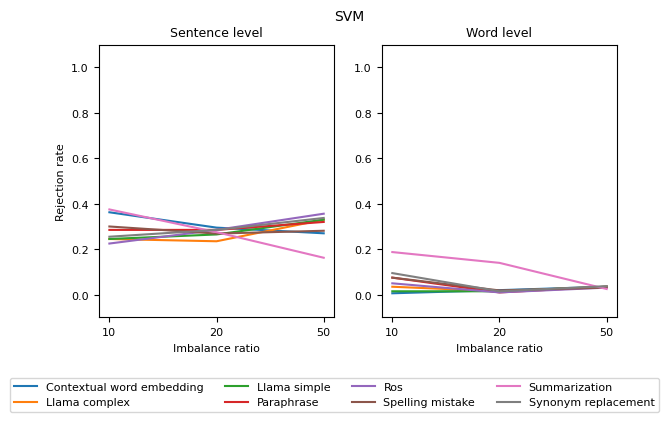

xai_rr_ratio_LSTM_Amazon.png


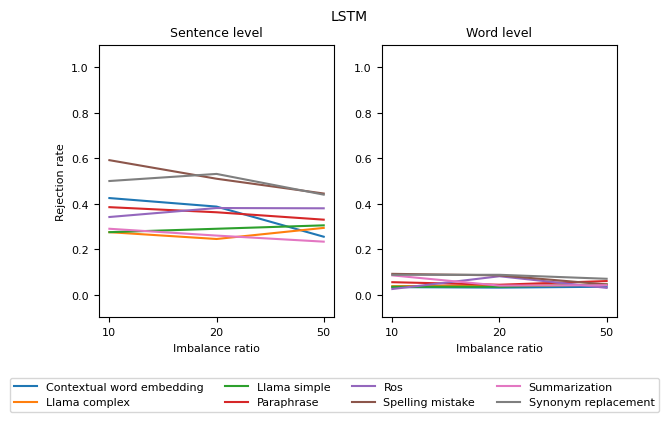

xai_rr_ratio_DistilBERT_Amazon.png


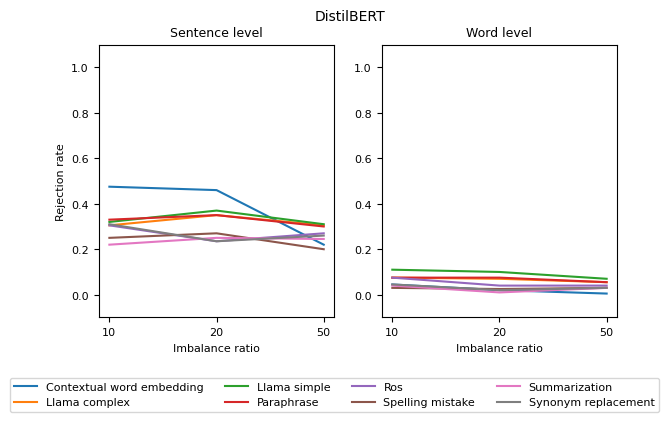

In [39]:


for model_name in ["SVM", "LSTM", "DistilBERT"]:
    r1 = final_sentence[final_sentence["Model name"]==model_name]
    fig, ax=plt.subplots(1, 2, figsize=(17*cm, 9*cm))
    r = pd.concat([similarity_balancing_methods(r1[r1["Imbalance %"]==str(ratio)], pr=False)["rejection rate"] for ratio in [10,20,50]],axis=1)
    for bal in r.index:
        ax[0].plot(r[r.index == bal].values[0], label=bal)
    ax[0].legend(loc='upper center', bbox_to_anchor=(1, -0.2), ncol=4)
    ax[0].set_xticks([0,1,2],[10,20,50])
    ax[0].set_ylim(-0.1,1.1)
    ax[0].set_xlabel("Imbalance ratio")
    ax[0].set_ylabel("Rejection rate")
    ax[0].set_title("Sentence level", fontsize=9)

    r2 = final_word[final_word["Model name"]==model_name]
    r = pd.concat([similarity_balancing_methods(r2[r2["Imbalance %"]==str(ratio)], pr=False)["rejection rate"] for ratio in [10,20,50]],axis=1)
    for bal in r.index:
        ax[1].plot(r[r.index == bal].values[0], label=bal)
    ax[1].set_ylim(-0.1,1.1)
    ax[1].set_xticks([0,1,2],[10,20,50])
    ax[1].set_xlabel("Imbalance ratio")
    ax[1].set_title("Word level", fontsize=9)
    plt.suptitle(model_name, fontsize=10)
    print(fr"xai_rr_ratio_{model_name}_{task}.png")
    plt.savefig(fr"C:\Users\Maciek\Downloads\xai_rr_ratio_{model_name}_{task}.png", bbox_inches='tight')
    plt.show()

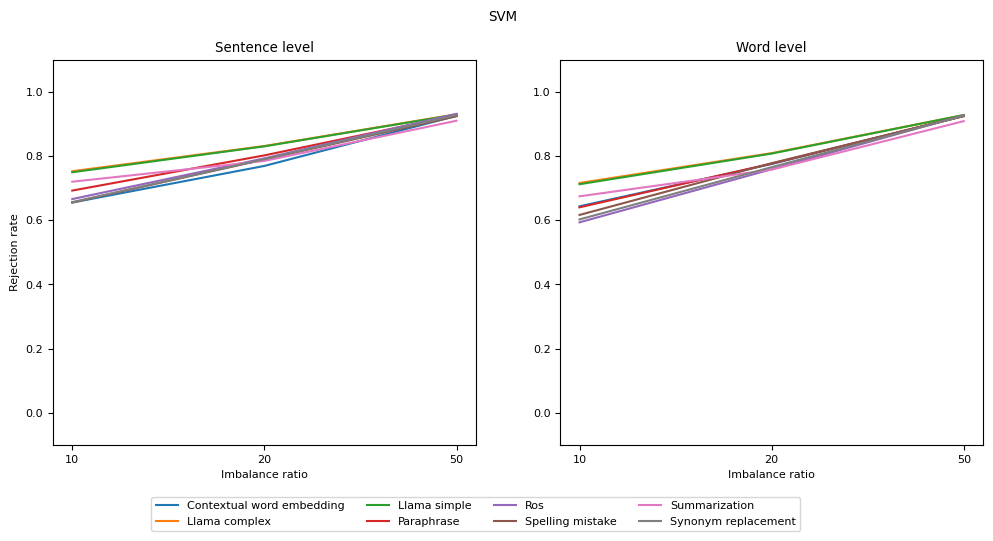

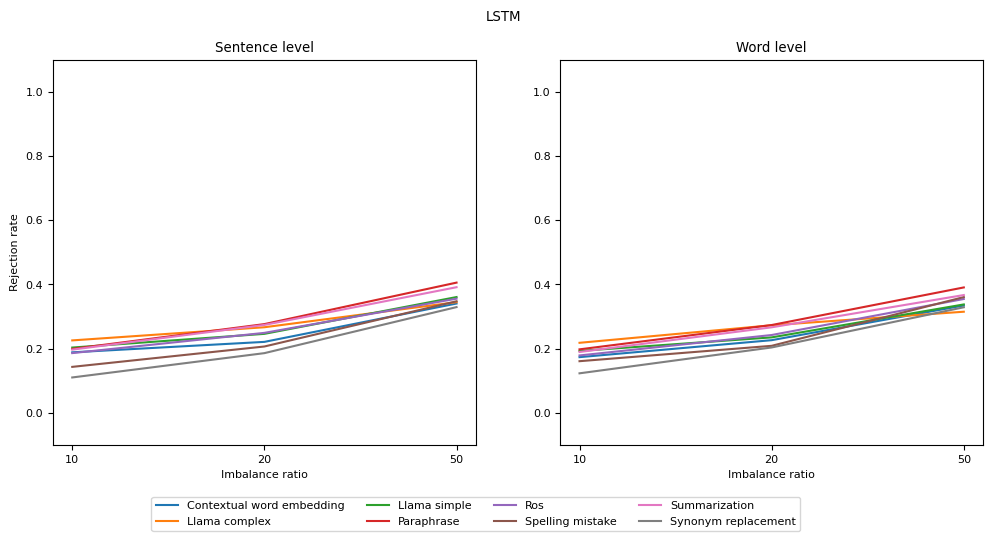

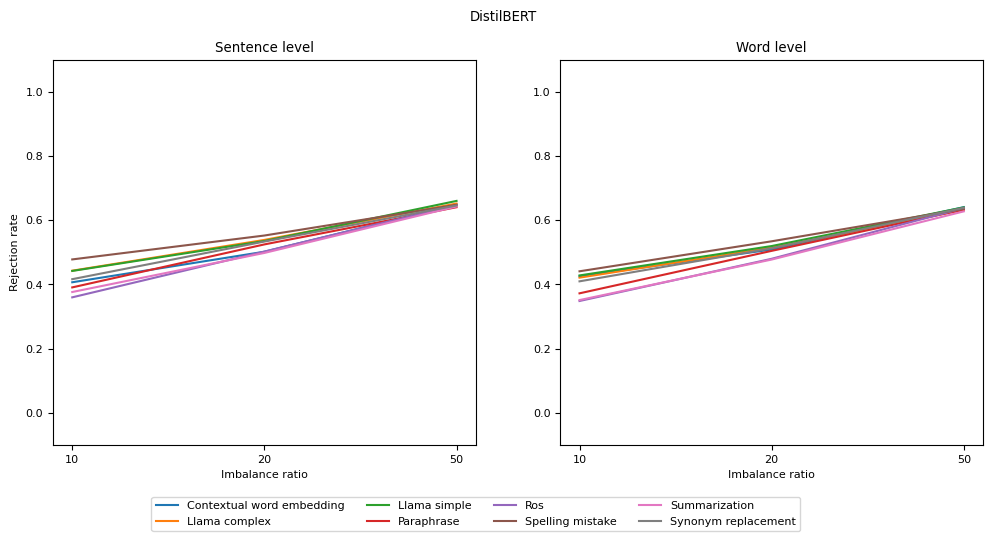

In [40]:




for model_name in ["SVM", "LSTM", "DistilBERT"]:
    r1 = final_sentence[final_sentence["Model name"]==model_name]
    fig, ax=plt.subplots(1, 2, figsize=(12, 5))
    r = pd.concat([similarity_balancing_methods(r1[r1["Imbalance %"]==str(ratio)], pr=False, spearman = True)["mean"] for ratio in [10,20,50]],axis=1)
    for bal in r.index:
        ax[0].plot(r[r.index == bal].values[0], label=bal)
    ax[0].legend(loc='upper center', bbox_to_anchor=(1, -0.12), ncol=4)
    ax[0].set_xticks([0,1,2],[10,20,50])
    ax[0].set_ylim(-0.1,1.1)
    ax[0].set_xlabel("Imbalance ratio")
    ax[0].set_ylabel("Rejection rate")
    ax[0].set_title("Sentence level")

    r2 = final_word[final_word["Model name"]==model_name]
    r = pd.concat([similarity_balancing_methods(r2[r2["Imbalance %"]==str(ratio)], pr=False, spearman = True)["mean"] for ratio in [10,20,50]],axis=1)
    for bal in r.index:
        ax[1].plot(r[r.index == bal].values[0], label=bal)
    ax[1].set_ylim(-0.1,1.1)
    ax[1].set_xticks([0,1,2],[10,20,50])
    ax[1].set_xlabel("Imbalance ratio")
    ax[1].set_title("Word level")
    plt.suptitle(model_name)
    plt.show()

# Now what if we remove models that performed significantly worse than original model based on f1

xai_rr_ratio_SVM_Amazon.png


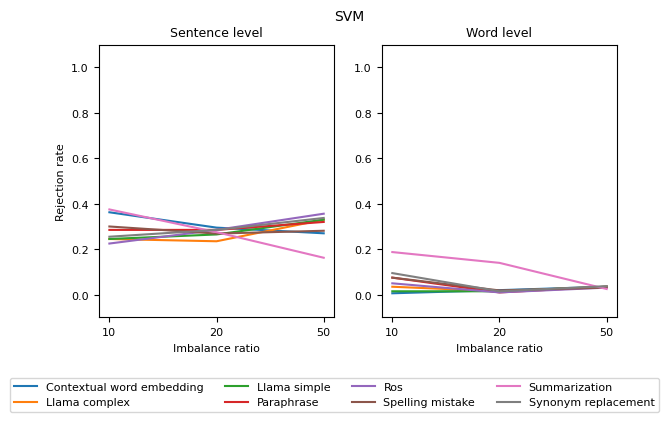

xai_rr_ratio_LSTM_Amazon.png


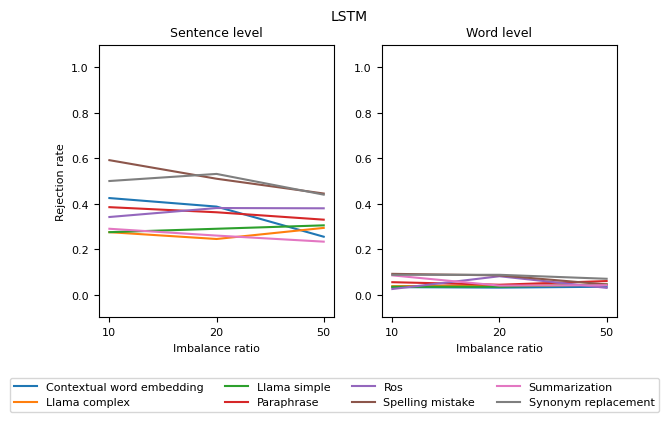

xai_rr_ratio_DistilBERT_Amazon.png


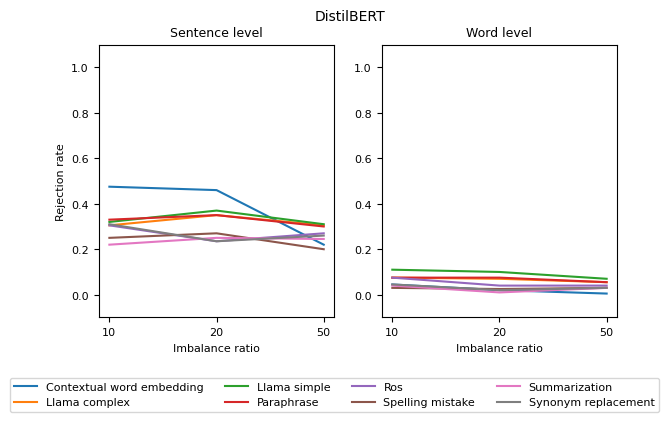

In [41]:


for model_name in ["SVM", "LSTM", "DistilBERT"]:
    r1 = final_sentence[final_sentence["Model name"]==model_name]
    fig, ax=plt.subplots(1, 2, figsize=(17*cm, 9*cm))
    r = pd.concat([similarity_balancing_methods(r1[r1["Imbalance %"]==str(ratio)], pr=False)["rejection rate"] for ratio in [10,20,50]],axis=1)
    for bal in r.index:
        ax[0].plot(r[r.index == bal].values[0], label=bal)
    ax[0].legend(loc='upper center', bbox_to_anchor=(1, -0.2), ncol=4)
    ax[0].set_xticks([0,1,2],[10,20,50])
    ax[0].set_ylim(-0.1,1.1)
    ax[0].set_xlabel("Imbalance ratio")
    ax[0].set_ylabel("Rejection rate")
    ax[0].set_title("Sentence level", fontsize=9)

    r2 = final_word[final_word["Model name"]==model_name]
    r = pd.concat([similarity_balancing_methods(r2[r2["Imbalance %"]==str(ratio)], pr=False)["rejection rate"] for ratio in [10,20,50]],axis=1)
    for bal in r.index:
        ax[1].plot(r[r.index == bal].values[0], label=bal)
    ax[1].set_ylim(-0.1,1.1)
    ax[1].set_xticks([0,1,2],[10,20,50])
    ax[1].set_xlabel("Imbalance ratio")
    ax[1].set_title("Word level", fontsize=9)
    plt.suptitle(model_name, fontsize=10)
    print(fr"xai_rr_ratio_{model_name}_{task}.png")
    plt.savefig(fr"C:\Users\Maciek\Downloads\xai_rr_ratio_{model_name}_{task}.png", bbox_inches='tight')
    plt.show()

============================================== SVM ==============================================
F1 score of original model: 0.92
Threshold- 80% of F1 of original model: 0.74
This further removes 30 (22.1%) of remaining models


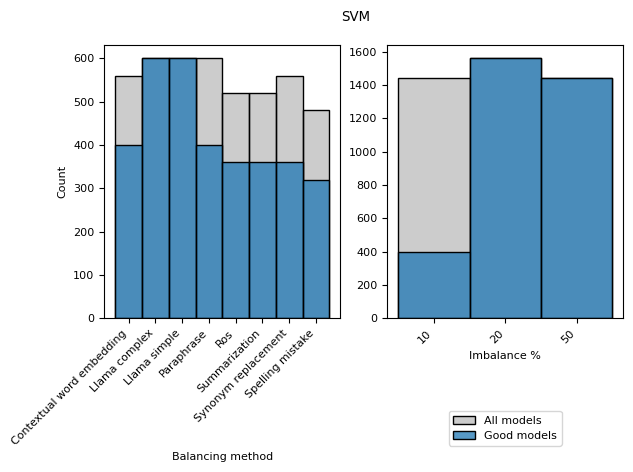

removal_of_bad_xai_SVM_Amazon.png
============================================== LSTM ==============================================
F1 score of original model: 0.76
Threshold- 80% of F1 of original model: 0.61
This further removes 63 (50.8%) of remaining models


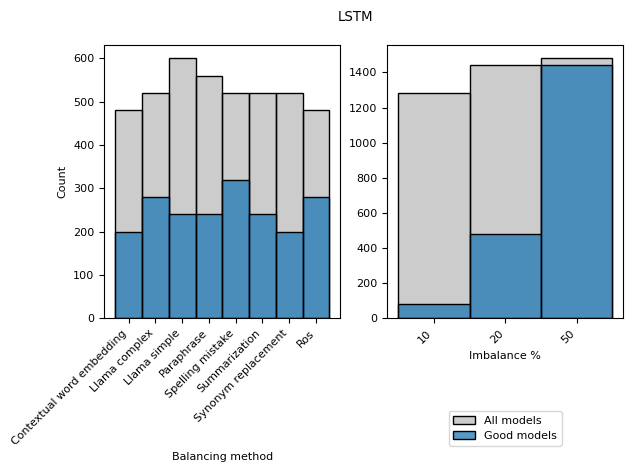

removal_of_bad_xai_LSTM_Amazon.png
============================================== DistilBERT ==============================================
F1 score of original model: 0.94
Threshold- 80% of F1 of original model: 0.75
This further removes 0 (0.0%) of remaining models


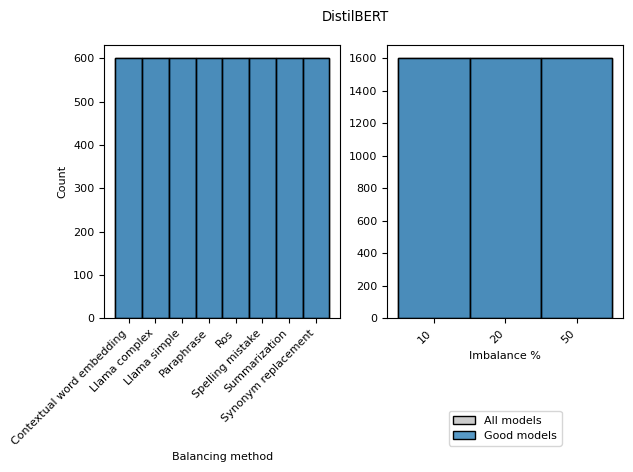

removal_of_bad_xai_DistilBERT_Amazon.png


In [42]:
for model_name in ["SVM", "LSTM", "DistilBERT"]:
    print("============================================== "+model_name+" ==============================================")

    if task == "Amazon":
        metrics = pd.read_csv(f"amazon-review_{model_name}.csv")
    else:
        metrics = pd.read_csv(f"nlpaug_{model_name}.csv")

    # Getting f1 score of model trained on original data
    f1 = metrics[(metrics["Balancing method"]=="original")&(metrics["Model name"]==model_name)].f1.values[0]
    print(f"F1 score of original model: {np.round(f1, 2)}")
    # Calculating threshold
    threshold = np.round(f1*0.8, 2)
    print(f"Threshold- 80% of F1 of original model: {threshold}")
    metrics_temp = metrics[(metrics.auc>0.6) & (metrics.f1!=0)]
    print(f"This further removes {len(metrics_temp[metrics_temp.f1<threshold])} ({np.round(len(metrics_temp[metrics_temp.f1<threshold])/len(metrics_temp)*100,1)}%) of remaining models")
    final_word_tmp = final_word[final_word["Model name"]==model_name]



    fig, ax=plt.subplots(1, 2, figsize=(17*cm, 9*cm))

    for i,dimension in enumerate(["Balancing method", "Imbalance %"]):
        sns.histplot(final_word_tmp[dimension].astype(str),color="gray", alpha=.4, label="All models", ax=ax[i])
        metrics_temp = final_word_tmp[final_word_tmp.f1>=threshold]
        g=sns.histplot(metrics_temp[dimension].astype(str),label="Good models", ax=ax[i])
        ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha="right")
    ax[1].set_ylabel("")

    plt.legend(ncol=1)
    plt.suptitle(model_name)
    sns.move_legend(g, "upper center", bbox_to_anchor=(1/2, -0.32))
    plt.savefig(out+"\\"+f"removal_of_bad_xai_{model_name}_{task}.png", bbox_inches='tight')
    plt.show()
    print(f"removal_of_bad_xai_{model_name}_{task}.png")

In [43]:
display(final_word) 
metrics_temp

,Model ID,Imbalance %,Balancing method,id,original,spearman_original,normality_original,imbalanced,spearman_imbalanced,normality_imbalanced,...,mcc,auc,spearman,spearman_pval,ID,loss,runtime,samples_per_second,steps_per_second,epoch
0,0,10,Contextual word embedding,0,0.109597,0.670103,2.617805e-25,0.807961,0.703050,2.617805e-25,...,0.518222,0.935753,1.000000,6.646897e-64,Contextual_word_embedding100SVM,NaN,NaN,NaN,NaN,NaN
1,0,10,Contextual word embedding,1,0.416038,0.551791,5.506486e-31,0.489066,0.899656,5.506486e-31,...,0.518222,0.935753,1.000000,6.646897e-64,Contextual_word_embedding100SVM,NaN,NaN,NaN,NaN,NaN
2,0,10,Contextual word embedding,2,0.840847,0.662077,2.185405e-25,0.940095,0.919447,2.185405e-25,...,0.518222,0.935753,1.000000,6.646897e-64,Contextual_word_embedding100SVM,NaN,NaN,NaN,NaN,NaN
3,0,10,Contextual word embedding,3,0.437897,0.728062,8.557387e-17,0.883572,0.907660,8.557387e-17,...,0.518222,0.935753,1.000000,6.646897e-64,Contextual_word_embedding100SVM,NaN,NaN,NaN,NaN,NaN
4,0,10,Contextual word embedding,4,0.199218,0.773498,7.320441e-07,0.807465,0.888609,7.320441e-07,...,0.518222,0.935753,1.000000,6.646897e-64,Contextual_word_embedding100SVM,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,4,50,Synonym replacement,35,0.393765,0.324329,3.136894e-15,0.195808,0.826699,3.136894e-15,...,0.812609,0.970883,0.978728,8.731483e-07,Synonym replacement504,0.296421,42.5528,102.531,12.831,2.0
4796,4,50,Synonym replacement,36,0.209664,0.832685,4.335609e-33,0.844296,0.829973,4.335609e-33,...,0.812609,0.970883,0.978728,8.731483e-07,Synonym replacement504,0.296421,42.5528,102.531,12.831,2.0
4797,4,50,Synonym replacement,37,0.601460,0.614460,9.383822e-60,0.836175,0.700809,9.383822e-60,...,0.812609,0.970883,0.978728,8.731483e-07,Synonym replacement504,0.296421,42.5528,102.531,12.831,2.0
4798,4,50,Synonym replacement,38,0.451112,0.473236,1.415330e-28,0.902142,0.401575,1.415330e-28,...,0.812609,0.970883,0.978728,8.731483e-07,Synonym replacement504,0.296421,42.5528,102.531,12.831,2.0


,Model ID,Imbalance %,Balancing method,id,original,spearman_original,normality_original,imbalanced,spearman_imbalanced,normality_imbalanced,...,mcc,auc,spearman,spearman_pval,ID,loss,runtime,samples_per_second,steps_per_second,epoch
0,0,10,Contextual word embedding,0,0.873233,0.532755,2.101114e-23,0.438986,0.406397,2.101114e-23,...,0.692981,0.955999,0.960491,1.016324e-05,Contextual_word_embedding100,0.953726,42.2950,103.156,12.909,2.0
1,0,10,Contextual word embedding,1,0.996537,0.338876,9.752945e-33,0.721281,-0.035483,9.752945e-33,...,0.692981,0.955999,0.960491,1.016324e-05,Contextual_word_embedding100,0.953726,42.2950,103.156,12.909,2.0
2,0,10,Contextual word embedding,2,0.576790,0.124104,4.837323e-27,0.107898,0.210531,4.837323e-27,...,0.692981,0.955999,0.960491,1.016324e-05,Contextual_word_embedding100,0.953726,42.2950,103.156,12.909,2.0
3,0,10,Contextual word embedding,3,0.778702,0.594458,2.884930e-21,0.061744,0.323969,2.884930e-21,...,0.692981,0.955999,0.960491,1.016324e-05,Contextual_word_embedding100,0.953726,42.2950,103.156,12.909,2.0
4,0,10,Contextual word embedding,4,0.886029,0.255061,1.637977e-07,0.199218,0.361199,1.637977e-07,...,0.692981,0.955999,0.960491,1.016324e-05,Contextual_word_embedding100,0.953726,42.2950,103.156,12.909,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,4,50,Synonym replacement,35,0.393765,0.324329,3.136894e-15,0.195808,0.826699,3.136894e-15,...,0.812609,0.970883,0.978728,8.731483e-07,Synonym replacement504,0.296421,42.5528,102.531,12.831,2.0
4796,4,50,Synonym replacement,36,0.209664,0.832685,4.335609e-33,0.844296,0.829973,4.335609e-33,...,0.812609,0.970883,0.978728,8.731483e-07,Synonym replacement504,0.296421,42.5528,102.531,12.831,2.0
4797,4,50,Synonym replacement,37,0.601460,0.614460,9.383822e-60,0.836175,0.700809,9.383822e-60,...,0.812609,0.970883,0.978728,8.731483e-07,Synonym replacement504,0.296421,42.5528,102.531,12.831,2.0
4798,4,50,Synonym replacement,38,0.451112,0.473236,1.415330e-28,0.902142,0.401575,1.415330e-28,...,0.812609,0.970883,0.978728,8.731483e-07,Synonym replacement504,0.296421,42.5528,102.531,12.831,2.0


# Are balanced models more similar to original or imbalanced model?

### Sentence

In [44]:
 def get_latex(results):
        results.reset_index(inplace=True)
        results = results[list(results.columns[1:3])+["index"]+list(results.columns[3:])]
        results = results.rename(columns={"index":"compared model"})
        l = results.reset_index(drop=True).astype(str).to_latex(index=False)
        l = l.replace("_", "\_").replace("%", "\%").replace("\n\\bottomrule","\hline").replace("\n\\midrule","\hline").replace("\n\\toprule","\hline").replace(r"begin{tabular}{",r"begin{tabular}{|").replace("}\\hline\n","|}\\hline\n").replace("index", " ")
        l = "\\\\\hline\noriginal".join(l.split("\\\\\noriginal"))
        for mn in ["SVM", "LSTM", "DistilBERT"]:
            l = l.split(mn)[0]+"\hline\multirow{4}{*}{"+mn+"}"+" ".join(l.split(mn)[1:])
            
        l_tmp = l
        for level in ["sentence", "word"]:
            i=0
            for ls in l_tmp.split(level):
                if i==0:
                    l_tmp = ""
                if i%2==1:
                    l_tmp += "\multirow{2}{*}{"+level+"}"
                l_tmp += ls
                i+=1
                
        l = l_tmp.replace("& \multirow{2}{*}{word}","\cline{2-6} & \multirow{2}{*}{word}")
        print(l)

In [45]:
# Method used to calculate descriptive statistics of p-values comparing XAI of balanced models to XAI of original and imbalanced models
def similarity_balanced_imbalanced(final_sentence, final_word, threshold = None, spearman=False, good=True):
    def get_similarity(final, threshold, spearman, good):
        # Filtering models if threshold was provided
        if 1-spearman:
            df_tmp = final[["original", "imbalanced", "f1"]].dropna()
        else:
            df_tmp = final[["spearman_original", "spearman_imbalanced", "f1"]].dropna()
        
        
        if threshold != None:
            df_tmp1 = df_tmp[df_tmp.f1>threshold]
            df_tmp1 = df_tmp.drop("f1", axis=1)
            res = pd.DataFrame(data={"mean good": np.round(np.mean(df_tmp1, axis=0), 4),
                                "median good": np.round(np.median(df_tmp1, axis=0), 4),
                                "rejection rate good": np.round(np.mean(df_tmp1<0.05, axis=0), 4) })
            df_tmp = df_tmp[df_tmp.f1<=threshold]
            df_tmp = df_tmp.drop("f1", axis=1)
            res = pd.concat([res,pd.DataFrame(data={"mean bad": np.round(np.mean(df_tmp, axis=0), 4),
                                "median bad": np.round(np.median(df_tmp, axis=0), 4),
                                "rejection rate bad": np.round(np.mean(df_tmp<0.05, axis=0), 4) })], axis=1)
        else:
            # Calculating descriptive statistics
            df_tmp = df_tmp.drop("f1", axis=1)
            res = pd.DataFrame(data={"mean": np.round(np.mean(df_tmp, axis=0), 4),
                                "median": np.round(np.median(df_tmp, axis=0), 4),
                                "rejection rate": np.round(np.mean(df_tmp<0.05, axis=0), 4) })
        if spearman and threshold==None:
            res=res.drop(["rejection rate"], axis=1)
        elif spearman:
            res=res.drop(["rejection rate good"], axis=1).drop(["rejection rate bad"], axis=1)
        
        return res
    
    def get_latex(res):
        res = res.reset_index()
        res = res[list(res.columns)[1:3]+["index"]+list(res.columns)[3:]]
        l=res.astype(str).to_latex(index=False)
        l = l.replace("_", "\_").replace("%", "\%").replace("\n\\bottomrule","\hline").replace("\n\\midrule","\hline").replace("\n\\toprule","\hline").replace(r"begin{tabular}{",r"begin{tabular}{|").replace("}\\hline\n","|}\\hline\n").replace("index", r"\multirow{2}{*}{compared to}")
        l = "\\\\\hline\noriginal".join(l.split("\\\\\noriginal"))
        if "median good" in res.columns:
            l=l.split("\\\\")[0].replace("model","").replace("level",r"\multirow{2}{*}{level}").replace("mean good","").replace("median good","good models").replace("rejection rate good","").replace("mean bad","").replace("median bad","bad models").replace("rejection rate bad","")+"\\\\\n"+l.split("\\\\")[0].split("\hline\n")[1].replace("good","").replace("model","").replace("multirow{2}{*}{compared to}","").replace("bad","").replace("level","").replace("rejection rate bad","")+"\\\\".join(l.split("\\\\")[1:])
            l=l.replace(" \\hline"," \\\\\hline").replace("|lllllllll|","|lll|lll|lll|")
            
        for mn in ["SVM", "LSTM", "DistilBERT"]:
            l = l.split(mn)[0]+r"\hline\multirow{4}{*}{\rotatebox[origin=c]{90}{"+mn+"}}"+" ".join(l.split(mn)[1:])
            
        l_tmp = l
        for level in ["sentence", "word"]:
            i=0
            for ls in l_tmp.split(level):
                if i==0:
                    l_tmp = ""
                if i%2==1:
                    l_tmp += "\multirow{2}{*}{"+level+"}"
                l_tmp += ls
                i+=1
        l = l_tmp.replace("& \multirow{2}{*}{word}","\cline{2-9} & \multirow{2}{*}{word}")
        print(l)
        
    result = []  
    for model_name in ["SVM", "LSTM", "DistilBERT"]:
        final_sentence_tmp = final_sentence[final_sentence["Model name"]==model_name]
        final_word_tmp = final_word[final_word["Model name"]==model_name] 
        res = pd.concat([get_similarity(final_sentence_tmp, threshold, spearman, good), get_similarity(final_word_tmp, threshold, spearman, good)])
        res["level"] = ["sentence", "sentence", "word", "word"]
        res["model"] = model_name
        res = res[["model", "level"]+list(res.columns)[:-2]]
        result.append(res)
        
    res = pd.concat(result)
    get_latex(res)
    display(res)

In [46]:
similarity_balanced_imbalanced(final_sentence, final_word, threshold)


\begin{tabular}{|lll|lll|lll|}\hline
 & \multirow{2}{*}{level} & \multirow{2}{*}{compared to} &  & good models &  &  & bad models &  \\
 &  & \ & mean  & median  & rejection rate  & mean  & median  & rejection rate  \\\hline
\hline\multirow{4}{*}{\rotatebox[origin=c]{90}{SVM}} & \multirow{2}{*}{sentence} & original & 0.3061 & 0.1976 & 0.2856 & 0.2753 & 0.136 & 0.2981 \\
  &  & imbalanced & 0.2882 & 0.1601 & 0.3619 & 0.2456 & 0.0957 & 0.4231 \\
  \cline{2-9} & \multirow{2}{*}{word} & original & 0.494 & 0.4907 & 0.043 & 0.466 & 0.4555 & 0.0817 \\
  &  & imbalanced & 0.4411 & 0.4181 & 0.1043 & 0.4224 & 0.3909 & 0.1346 \\
\hline\multirow{4}{*}{\rotatebox[origin=c]{90}{LSTM}} & \multirow{2}{*}{sentence} & original & 0.2741 & 0.1511 & 0.3595 & 0.2732 & 0.1502 & 0.3599 \\
  &  & imbalanced & 0.2446 & 0.1014 & 0.416 & 0.2427 & 0.1 & 0.4194 \\
  \cline{2-9} & \multirow{2}{*}{word} & original & 0.5153 & 0.5268 & 0.0526 & 0.5128 & 0.5225 & 0.0533 \\
  &  & imbalanced & 0.491 & 0.5005 & 0.076 & 0.

,model,level,mean good,median good,rejection rate good,mean bad,median bad,rejection rate bad
original,SVM,sentence,0.3061,0.1976,0.2856,0.2753,0.1360,0.2981
imbalanced,SVM,sentence,0.2882,0.1601,0.3619,0.2456,0.0957,0.4231
original,SVM,word,0.4940,0.4907,0.0430,0.4660,0.4555,0.0817
imbalanced,SVM,word,0.4411,0.4181,0.1043,0.4224,0.3909,0.1346
original,LSTM,sentence,0.2741,0.1511,0.3595,0.2732,0.1502,0.3599
imbalanced,LSTM,sentence,0.2446,0.1014,0.4160,0.2427,0.1000,0.4194
original,LSTM,word,0.5153,0.5268,0.0526,0.5128,0.5225,0.0533
imbalanced,LSTM,word,0.4910,0.5005,0.0760,0.4900,0.4986,0.0781
original,DistilBERT,sentence,0.3240,0.2310,0.2977,NaN,NaN,NaN
imbalanced,DistilBERT,sentence,0.3285,0.2345,0.2585,NaN,NaN,NaN


### Spearman

In [47]:
display(similarity_balanced_imbalanced(final_sentence, final_word, threshold, spearman = True))


\begin{tabular}{|lllllll|}\hline
 & \multirow{2}{*}{level} & \multirow{2}{*}{compared to} &  & good models &  & bad models \\
 &  & \ & mean  & median  & mean  & median  \\\hline
\hline\multirow{4}{*}{\rotatebox[origin=c]{90}{SVM}} & \multirow{2}{*}{sentence} & spearman\_original & 0.8066 & 0.8347 & 0.6742 & 0.6998 \\
  &  & spearman\_imbalanced & 0.9252 & 0.9483 & 0.8521 & 0.8745 \\
  \cline{2-9} & \multirow{2}{*}{word} & spearman\_original & 0.7847 & 0.8198 & 0.6279 & 0.6643 \\
  &  & spearman\_imbalanced & 0.9228 & 0.9435 & 0.8424 & 0.8609 \\
\hline\multirow{4}{*}{\rotatebox[origin=c]{90}{LSTM}} & \multirow{2}{*}{sentence} & spearman\_original & 0.2649 & 0.2582 & 0.2592 & 0.2536 \\
  &  & spearman\_imbalanced & 0.4115 & 0.4218 & 0.4123 & 0.4234 \\
  \cline{2-9} & \multirow{2}{*}{word} & spearman\_original & 0.2607 & 0.245 & 0.2544 & 0.2366 \\
  &  & spearman\_imbalanced & 0.4063 & 0.4051 & 0.4065 & 0.407 \\
\hline\multirow{4}{*}{\rotatebox[origin=c]{90}{DistilBERT}} & \multirow{2}{*

,model,level,mean good,median good,mean bad,median bad
spearman_original,SVM,sentence,0.8066,0.8347,0.6742,0.6998
spearman_imbalanced,SVM,sentence,0.9252,0.9483,0.8521,0.8745
spearman_original,SVM,word,0.7847,0.8198,0.6279,0.6643
spearman_imbalanced,SVM,word,0.9228,0.9435,0.8424,0.8609
spearman_original,LSTM,sentence,0.2649,0.2582,0.2592,0.2536
spearman_imbalanced,LSTM,sentence,0.4115,0.4218,0.4123,0.4234
spearman_original,LSTM,word,0.2607,0.2450,0.2544,0.2366
spearman_imbalanced,LSTM,word,0.4063,0.4051,0.4065,0.4070
spearman_original,DistilBERT,sentence,0.5285,0.5507,NaN,NaN
spearman_imbalanced,DistilBERT,sentence,0.6343,0.6609,NaN,NaN


None

# Which method results in models the most similar to original model?

In [48]:
print("Sentence")
display(similarity_balancing_methods(final_sentence, threshold))
print("Word")
similarity_balancing_methods(final_word, threshold)

Sentence


,mean good,median good,rejection rate good,mean bad,median bad,rejection rate bad
Balancing method,,,,,,
Contextual word embedding,0.3067,0.1871,0.3426,0.2668,0.1581,0.3500
Llama complex,0.3082,0.2076,0.2950,0.3180,0.2239,0.2692
Llama simple,0.2950,0.1891,0.3105,0.3271,0.2288,0.2804
Paraphrase,0.3062,0.1990,0.3148,0.2796,0.1482,0.3456
Ros,0.3284,0.2335,0.2875,0.2660,0.1256,0.3344
Spelling mistake,0.3381,0.2553,0.2650,0.2083,0.0684,0.4617
Summarization,0.3525,0.2764,0.2333,0.3005,0.1808,0.2912
Synonym replacement,0.3322,0.2267,0.2833,0.2356,0.0943,0.4222


Word


,mean good,median good,rejection rate good,mean bad,median bad,rejection rate bad
Balancing method,,,,,,
Contextual word embedding,0.5556,0.5768,0.0259,0.4924,0.4883,0.0250
Llama complex,0.4802,0.4588,0.0475,0.5351,0.5527,0.0404
Llama simple,0.4785,0.4546,0.0565,0.5370,0.5602,0.0393
Paraphrase,0.4984,0.5025,0.0481,0.4989,0.4976,0.0632
Ros,0.4976,0.4846,0.0396,0.4926,0.4851,0.0469
Spelling mistake,0.5721,0.6001,0.0310,0.4791,0.4779,0.0717
Summarization,0.4985,0.4817,0.0500,0.5045,0.5059,0.0882
Synonym replacement,0.5446,0.5498,0.0292,0.4932,0.4996,0.0847


### Spearman

In [49]:
print("Sentence")
display(similarity_balancing_methods(final_sentence, threshold, spearman = True))
print("Word")
similarity_balancing_methods(final_word, threshold, spearman = True)

Sentence


,mean good,median good,mean bad,median bad
Balancing method,,,,
Contextual word embedding,0.6262,0.6700,0.3657,0.3463
Llama complex,0.6913,0.7498,0.2779,0.2686
Llama simple,0.6758,0.7317,0.2737,0.2657
Paraphrase,0.6392,0.6766,0.3975,0.3698
Ros,0.6349,0.6922,0.3746,0.3621
Spelling mistake,0.6386,0.6641,0.3399,0.3092
Summarization,0.6312,0.6747,0.3767,0.3485
Synonym replacement,0.6517,0.6879,0.3395,0.3223


Word


,mean good,median good,mean bad,median bad
Balancing method,,,,
Contextual word embedding,0.6305,0.6663,0.3588,0.3200
Llama complex,0.6701,0.7219,0.2687,0.2547
Llama simple,0.6581,0.7074,0.2571,0.2450
Paraphrase,0.6257,0.6724,0.3763,0.3251
Ros,0.6179,0.6701,0.3531,0.3266
Spelling mistake,0.6239,0.6519,0.3370,0.3041
Summarization,0.6127,0.6631,0.3574,0.3274
Synonym replacement,0.6388,0.6709,0.3311,0.2920


### Is XAI correlated with other model evaluation dimensions?

,Unnamed: 0,model,id,words_sentence,lime_sentence,words_word,lime_word
0,0,amazon_review_50_imbalanced_3_SVM.obj,0,"['junk', 'I', 'bought', 'this', 'item', 'today...","[-0.003793765830207563, -0.0016514947194475448...",['4' '5' '8gb' 'After' 'Aside' 'I' 'Kmart' 'Ma...,"[-0.0013365187856096627, -0.001943402772433773..."
1,1,amazon_review_50_imbalanced_3_SVM.obj,1,"['I', 'd', 'give', 'it', '6', 'stars', 'if', '...","[-0.00925297314576525, -0.008984065730127598, ...",['1' '100' '2' '3' '4' '5' '6' '7' 'And' 'Andr...,"[-0.008653353612176824, 0.0009080727006301128,..."
2,2,amazon_review_50_imbalanced_3_SVM.obj,2,"['Very', 'good', 'bang', 'for', 'your', 'buck'...","[0.026781618055836766, 0.04490728735278903, 0....",['24' '3' '7' 'Another' 'As' 'Go' 'Hope' 'I' '...,"[0.03058485747864986, -0.008722407106490073, -..."
3,3,amazon_review_50_imbalanced_3_SVM.obj,3,"['To', 'learn', 'on', 'it', 'is', 'great', 'I'...","[-0.021977011097483852, 0.0008823057263826397,...",['2' '4GB' '8' 'After' 'I' 'In' 'It' 'Overall'...,"[-0.0008210919692663685, 0.0001790269463376758..."
4,4,amazon_review_50_imbalanced_3_SVM.obj,4,"['to', 'kyros', 'or', 'not', 'to', 'kyros', 'f...","[-0.0868586550095909, 0.032482789098436216, -0...",['5' 'american' 'and' 'bad' 'battery' 'being' ...,"[0.005442515418285386, 0.018928624310060222, 0..."
...,...,...,...,...,...,...,...
15715,5555,amazon_review_10_imbalanced_4_DistilBERT.obj,35,"['iGod', 'I', 'have', 'difficulty', 'with', 'm...","[-0.025105207478321137, 0.005711591151787516, ...",['2' 'I' 'Many' 'There' 'When' 'a' 'allow' 'am...,"[-0.011342556543908998, 0.005711591151787516, ..."
15716,5556,amazon_review_10_imbalanced_4_DistilBERT.obj,36,"['iPad', 'pood', 'This', 'is', 'not', 'worth',...","[0.006756197293408051, 0.0010421791294419132, ...",['For' 'I' 'If' 'In' 'It' 'O' 'Oh' 'This' 'Yes...,"[-0.003610300307569808, 0.002620818236539065, ..."
15717,5557,amazon_review_10_imbalanced_4_DistilBERT.obj,37,"['Cruz', 'T301', 'is', 'worth', 'checking', 'o...","[0.04835314642340072, -0.008084273160322324, -...",['16' '1Market' '2' '24' '3' '32' '8' '99' 'A'...,"[-0.016552075190659595, -0.00881095233493245, ..."
15718,5558,amazon_review_10_imbalanced_4_DistilBERT.obj,38,"['Don', 't', 'Hesitate', 'to', 'Buy', 'I', 'di...","[0.030793532382375796, 0.030627337427602083, 0...",['18' 'AYL' 'Amazon' 'Android' 'As' 'Asus' 'Bl...,"[-0.00020349468557982303, 0.006335722085845123..."


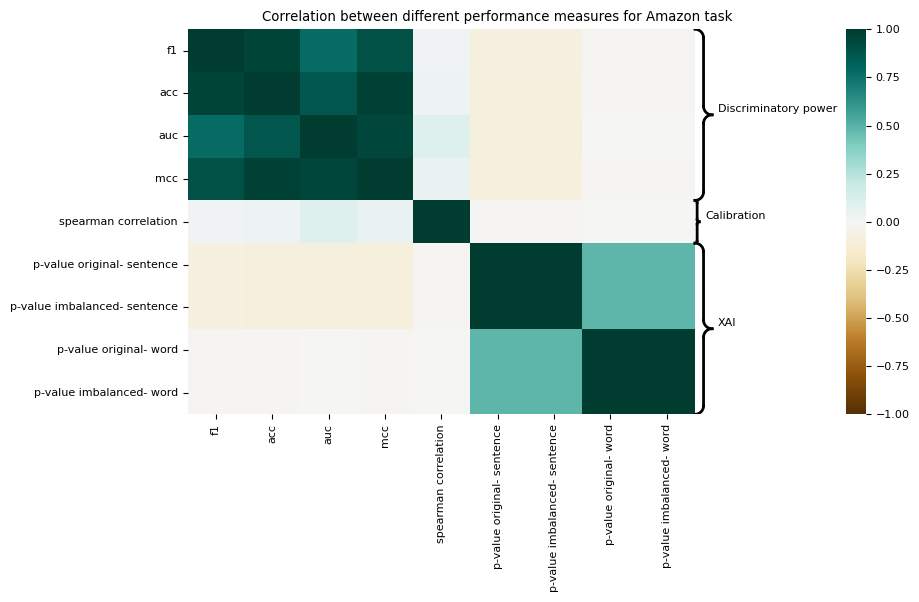

,Unnamed: 0.1,Unnamed: 0,model,id,words_sentence,lime_sentence,words_word,lime_word
0,0,0,eraser_movie_20_imbalanced_1_SVM.obj,0,"['there', 'may', 'not', 'be', 'a', 'critic', '...","[-0.0023510436284893874, -0.001149116990255253...",['a' 'about' 'accidental' 'act' 'action' 'affe...,"[0.0008153790846635893, -0.0001337514776326615..."
1,1,1,eraser_movie_20_imbalanced_1_SVM.obj,1,"['renee', 'zellweger', 'stars', 'as', 'sonia',...","[-0.0008797237142304188, 0.0008984306385663214...",['1991' '1997' '21' 'a' 'about' 'acting' 'adeq...,"[-0.0013887081663881433, 0.0029263515487032345..."
2,2,2,eraser_movie_20_imbalanced_1_SVM.obj,2,"['there', 're', 'so', 'many', 'things', 'to', ...","[-0.01756281249605644, -0.0013797640438211855,...",['20' '3' '4' '99' 'a' 'about' 'acting' 'actua...,"[0.007120218003259248, -0.007146497366048108, ..."
3,3,3,eraser_movie_20_imbalanced_1_SVM.obj,3,"['do', 'n', 't', 'let', 'this', 'movie', 'fool...","[-0.02486473749378378, -0.002608375949646954, ...",['a' 'about' 'accolade' 'achievement' 'again' ...,"[0.0028418046373063187, -0.0036055113211421476..."
4,4,4,eraser_movie_20_imbalanced_1_SVM.obj,4,"['it', 's', 'a', 'good', 'thing', 'most', 'ani...","[-0.0016676413159903399, -2.265893067244543e-0...",['31st' 'a' 'about' 'action' 'aliens' 'all' 'a...,"[-0.0045547639473927995, 0.0005126824509492028..."
...,...,...,...,...,...,...,...,...
13835,1595,1595,eraser_movie_10_Contextual_word_embedding_3_Di...,35,"['the', 'plot', 'of', 'big', 'momma', 's', 'ho...","[-0.029835558249404176, -0.041857015914193385,...",['90' '_' '_and' 'a' 'about' 'absolutely' 'acc...,"[-0.020796777246296694, -0.0144997436856854, 0..."
13836,1596,1596,eraser_movie_10_Contextual_word_embedding_3_Di...,36,"['starring', 'william', 'baldwin', 'cindy', 'c...","[0.04080479710871758, -0.022547427839991706, 0...",['a' 'ability' 'about' 'acted' 'acting' 'actor...,"[0.046588454637025906, 0.04822721028970748, 0...."
13837,1597,1597,eraser_movie_10_Contextual_word_embedding_3_Di...,37,"['take', 'a', 'look', 'at', 'the', 'following'...","[0.00826998838368842, -0.02240867720370128, -0...",['1' '20' '25' 'a' 'academy3' 'actors' 'allen'...,"[0.04033952731447936, -0.001563022358366624, 0..."
13838,1598,1598,eraser_movie_10_Contextual_word_embedding_3_Di...,38,"['synopsis', 'a', 'maniac', 'crazed', 'by', 'v...","[-0.03918655046479479, 0.011104326074841684, 0...",['2007' '76' 'a' 'abandoned' 'able' 'about' 'a...,"[-0.0450886705264764, -0.05509696744775729, 0...."


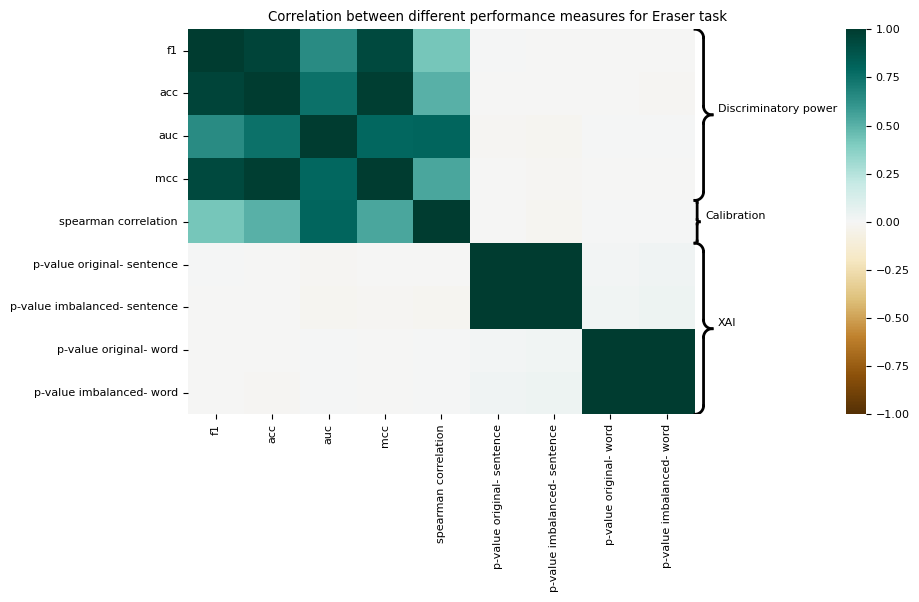

In [50]:
from curlyBrace import curlyBrace

# Method used to preprocess the dataset and get p_values for all models
def preprocess_dataset2(df, task):
       
    # Adding additionall columns based on model name
    name = pd.DataFrame(list(df["model"].map(lambda x:get_method_and_percentage(x))))
    name.columns = ["Balancing method", "Imbalance %", "Model name", "Model ID"]
    name["Balancing method"] = name["Balancing method"].apply(lambda x: x[0].upper() + x[1:].lower().replace("_"," ")) # Capitalizing balancing method
    df = pd.concat([name, df[df.columns[2:]]], axis=1)
    df = df.sort_values(["id", "Imbalance %", "Model ID", "Balancing method", "Model name"])
    df.columns = [str(col).replace("eval_", "") for col in df.columns]
        
        
    final_sentence = []
    final_word = []
    for mn in ["SVM", "LSTM", "DistilBERT"]:
        if task == "Amazon":
            metrics = pd.read_csv(f"amazon-review_{mn}.csv")
        else:
            metrics = pd.read_csv(f"nlpaug_{mn}.csv")
        df_tmp = df[df["Model name"]==mn]
        
        # Filtering out models that were not supposed to be in the dataset
        df_tmp = df_tmp[df_tmp["Balancing method"]!="Amazon review"]
        results_sentence = get_p_values(df_tmp, lime="lime_sentence")
        results_word = get_p_values(df_tmp, lime="lime_word")
        final_sentence.append(add_metrics(results_sentence, metrics[metrics["Model name"]==mn]))
        final_word.append(add_metrics(results_word, metrics[metrics["Model name"]==mn]))
    
    return pd.concat(final_sentence), pd.concat(final_word)

def plot_results(final, save=True):
    fig, axes = plt.subplots(1, 1, figsize=(10, 5))


    plot_data = final[["f1", "acc", "auc", "mcc", "spearman", "normality_original", "normality_imbalanced", "normality_original_word", "normality_imbalanced_word"]]
    plot_data.columns = ["f1", "acc", "auc", "mcc", "spearman correlation", "p-value original- sentence", "p-value imbalanced- sentence", "p-value original- word", "p-value imbalanced- word"]
    sns.heatmap(plot_data.corr(), cmap='BrBG', vmin=-1, vmax=1)


    k_r1 = 0.05
    plt.xlim(0,11)
    plt.plot(20000,1, color='red', lw=1)
    curlyBrace(fig, axes, [9, 4], [9, 0.0], k_r1, bool_auto=True, str_text="Discriminatory power", color='black', lw=2, int_line_num=1)
    curlyBrace(fig, axes, [9, 5], [9, 4], k_r1, bool_auto=True, str_text="Calibration", color='black', lw=2, int_line_num=1)
    curlyBrace(fig, axes, [9, 9], [9, 5], k_r1, bool_auto=True, str_text="XAI", color='black', lw=2, int_line_num=1)
    plt.title(f"Correlation between different performance measures for {task} task")
    if save:
        plt.savefig(fr"C:\Users\Maciek\Downloads\correlation_dimension_{task}.png", bbox_inches='tight')
    plt.show()
    

    
for task in ["Amazon", "Eraser"]:
    final = []
    
    if task == "Amazon":
        path = r"C:\Users\Maciek\Documents\Studia\Magisterka\GitHub\BalancingMethodsNLP\Results\XAI_results_amazon_"
    else:
        path = r"C:\Users\Maciek\Documents\Studia\Magisterka\GitHub\BalancingMethodsNLP\Results\XAI_results_final_"
    
    df = pd.concat([pd.read_csv(path+f"{model}.csv") for model in ["SVM", "LSTM", "DistilBERT"]])
    df.reset_index(drop=True, inplace=True)
    display(df)



    final_sentence_tmp, final_word_tmp = preprocess_dataset2(df, task)
    final_word_tmp = final_word_tmp[["normality_original", "normality_imbalanced"]]
    final_word_tmp.columns = ["normality_original_word", "normality_imbalanced_word"]

    final = final_sentence_tmp.join(final_word_tmp)
    plot_results(final)
    
    
    
    
    